# TASK1- STOCK PREDECTION

# Here, we are Predicting the stocks of Google.

# Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error

# Exploratory data analysis

In [3]:
# Reading csv file. 
a = pd.read_csv("GOOG.csv")

In [4]:
#Creating a data frame of csv file
df = pd.DataFrame(a)

In [5]:
# showcasing the sample value of data frame for top five values.
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-02,60.294998,61.493999,60.239498,61.307499,61.307499,30626000
1,2018-08-03,61.480999,61.500000,60.752998,61.185501,61.185501,21792000
2,2018-08-06,61.250000,61.304401,60.789848,61.238499,61.238499,21634000
3,2018-08-07,61.849998,62.558498,61.808498,62.111000,62.111000,29880000
4,2018-08-08,62.023499,62.825001,61.900398,62.280499,62.280499,27406000


In [6]:
#showcasing the sample value of data frame for bottom five values.
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1252,2023-07-26,130.360001,131.369995,128.710007,129.660004,129.660004,46216900
1253,2023-07-27,131.800003,133.600006,129.179993,129.869995,129.869995,35931600
1254,2023-07-28,130.970001,134.070007,130.919998,133.009995,133.009995,26971000
1255,2023-07-31,133.009995,133.830002,132.130005,133.110001,133.110001,18381900
1256,2023-08-01,130.854996,132.919998,130.750000,131.889999,131.889999,22154300


In [7]:
#showcasing the total number of rows and coloumns.
df.shape

(1257, 7)

In [8]:
#showcasing the data type of each variable.
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
#It will generate the statistics for each coloumn.
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,92.109922,93.193863,91.128040,92.175676,92.175676,3.026473e+07
std,30.137653,30.442066,29.820904,30.119097,30.119097,1.314848e+07
min,48.695000,50.176998,48.505501,48.811001,48.811001,6.936000e+06
25%,62.052502,62.529999,61.599998,62.091000,62.091000,2.192600e+07
50%,89.399002,90.491997,88.390503,89.362503,89.362503,2.702400e+07
75%,117.000000,118.900002,116.150002,117.709999,117.709999,3.415400e+07
max,151.863495,152.100006,149.887497,150.709000,150.709000,1.241400e+08


In [10]:
#Gives the information of each variable of data frame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1257 non-null   object 
 1   Open       1257 non-null   float64
 2   High       1257 non-null   float64
 3   Low        1257 non-null   float64
 4   Close      1257 non-null   float64
 5   Adj Close  1257 non-null   float64
 6   Volume     1257 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [11]:
# Showcasing the null values of data frame.
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
#checking for duplicates in data frame.
df.duplicated().any(axis=0)

False

In [13]:
#creating a data frame with only one variable i.e. close and resetting the index of data frame.
df1 = df.reset_index()['Close']

In [14]:
# showcasing the sample value of data frame for top five values.
df1.head()

0    61.307499
1    61.185501
2    61.238499
3    62.111000
4    62.280499
Name: Close, dtype: float64

In [15]:
#showcasing the total number of rows and coloumns.
df1.shape

(1257,)

In [16]:
#showcasing the sample value of data frame for top five values
df1.head()

0    61.307499
1    61.185501
2    61.238499
3    62.111000
4    62.280499
Name: Close, dtype: float64

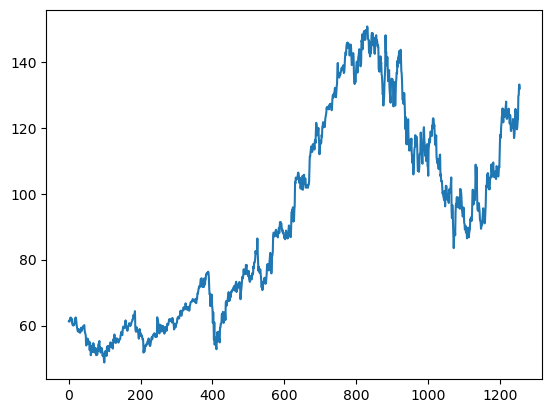

graph of data frame df1 for variable close


In [17]:
#Plotting the graph for data frame = df1
plt.plot(df1)
plt.show()
print("graph of data frame df1 for variable close")

In [18]:
#scaling the data present in data frame df1.
scaler = MinMaxScaler(feature_range = (0,1))
df1 =scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [19]:
print("Range of values present from 0 to 1")
df1

Range of values present from 0 to 1


array([[0.12263732],
       [0.12144007],
       [0.12196018],
       ...,
       [0.82630665],
       [0.82728808],
       [0.8153153 ]])

In [20]:
print("length of df1 :",len(df1))

length of df1 : 1257


# Preparing of test and train data

In [21]:
#splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [22]:
training_size,test_size

(817, 440)

In [23]:
train_data

array([[0.12263732],
       [0.12144007],
       [0.12196018],
       [0.13052267],
       [0.13218609],
       [0.13389862],
       [0.12826061],
       [0.12698482],
       [0.13046379],
       [0.11686197],
       [0.11299044],
       [0.11027693],
       [0.11361851],
       [0.1106008 ],
       [0.11340262],
       [0.11244578],
       [0.11993857],
       [0.1303264 ],
       [0.12509076],
       [0.13399673],
       [0.12900155],
       [0.11873147],
       [0.1083338 ],
       [0.1031718 ],
       [0.09579185],
       [0.09254843],
       [0.09245517],
       [0.09869673],
       [0.09156213],
       [0.09770062],
       [0.0963267 ],
       [0.08824021],
       [0.09077705],
       [0.09562013],
       [0.10336314],
       [0.0931667 ],
       [0.09673888],
       [0.10227381],
       [0.1002326 ],
       [0.10717577],
       [0.10660169],
       [0.10750454],
       [0.10985986],
       [0.11125339],
       [0.09419713],
       [0.08887808],
       [0.08476615],
       [0.079

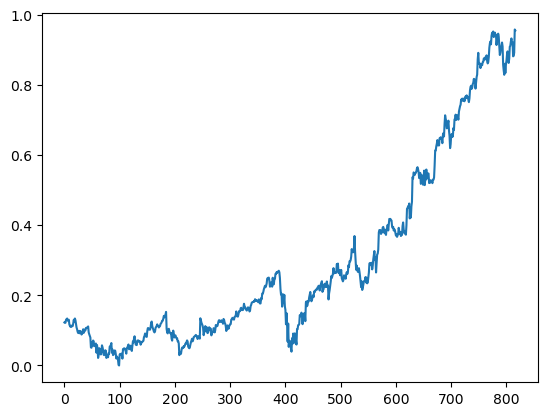

In [24]:
plt.plot(train_data)
plt.show()

In [25]:
test_data

array([[0.97606914],
       [0.93194176],
       [0.95244271],
       [0.9615399 ],
       [0.98011736],
       [0.98559341],
       [0.98667786],
       [0.98566709],
       [0.95993059],
       [0.9611278 ],
       [0.98956302],
       [0.98703606],
       [0.98397421],
       [0.98383674],
       [1.        ],
       [0.9925759 ],
       [0.96437129],
       [0.96121616],
       [0.96082847],
       [0.92244205],
       [0.95490587],
       [0.91896795],
       [0.91078329],
       [0.93196633],
       [0.91964016],
       [0.9321625 ],
       [0.97377278],
       [0.98048544],
       [0.97445488],
       [0.98003889],
       [0.96070088],
       [0.94368393],
       [0.96721722],
       [0.94238848],
       [0.92241255],
       [0.91847244],
       [0.93632363],
       [0.9631004 ],
       [0.96499933],
       [0.97404262],
       [0.95818365],
       [0.95873816],
       [0.95381167],
       [0.94082812],
       [0.94470444],
       [0.93824711],
       [0.87187681],
       [0.870

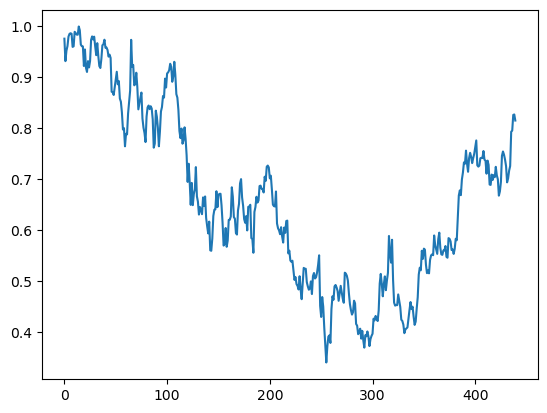

In [26]:
plt.plot(test_data)
plt.show()

In [27]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
            a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
            dataX.append(a)
            dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [28]:
# reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [29]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [30]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [31]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Tensorflow using lstm

In [32]:
#importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [33]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 233ms/step - loss: 0.0835 - val_loss: 0.0065
Epoch 2/100
12/12 [==============================] - 2s 151ms/step - loss: 0.0126 - val_loss: 0.0118
Epoch 3/100
12/12 [==============================] - 2s 162ms/step - loss: 0.0037 - val_loss: 0.0047
Epoch 4/100
12/12 [==============================] - 2s 203ms/step - loss: 0.0020 - val_loss: 0.0057
Epoch 5/100
12/12 [==============================] - 2s 201ms/step - loss: 0.0016 - val_loss: 0.0090
Epoch 6/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0014 - val_loss: 0.0053
Epoch 7/100
12/12 [==============================] - 3s 212ms/step - loss: 0.0013 - val_loss: 0.0047
Epoch 8/100
12/12 [==============================] - 2s 206ms/step - loss: 0.0013 - val_loss: 0.0051
Epoch 9/100
12/12 [==============================] - 2s 192ms/step - loss: 0.0013 - val_loss: 0.0051
Epoch 10/100
12/12 [==============================] - 3s 218ms/step - loss: 0.0013 - val_lo

In [39]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 41ms/step


In [45]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [46]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [47]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

91694463.11213666

In [48]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

118440957.7411247

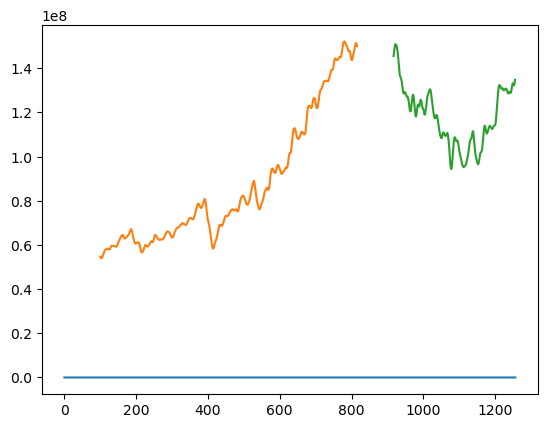

In [65]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [60]:
len(test_data)

440

In [61]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [62]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [63]:
temp_input

[0.43032251300636437,
 0.41412982996849623,
 0.4205087776061236,
 0.4459263130378056,
 0.4684979338995656,
 0.5128559884674476,
 0.526497070860047,
 0.521295800911655,
 0.5596674670716547,
 0.5437692647919415,
 0.5637892948221682,
 0.5618265084871784,
 0.5323853022864561,
 0.5157019815472529,
 0.5210014084771183,
 0.5153094223175079,
 0.5416102331901532,
 0.5505407716593139,
 0.5526016462796292,
 0.5509332523791758,
 0.5896975562788039,
 0.5705607231796573,
 0.5624153816798699,
 0.5535830001921823,
 0.582729804144633,
 0.5951932186617325,
 0.5653594532312652,
 0.5526016462796292,
 0.5516202138571927,
 0.5602563500780816,
 0.5603545070595547,
 0.5688924077890872,
 0.5475966215980356,
 0.5460263846790553,
 0.5844962863304116,
 0.5830242063929046,
 0.5780191817113111,
 0.5610414587238363,
 0.5624153816798699,
 0.5534848432107092,
 0.563347617846745,
 0.5832204516597034,
 0.5802763702945727,
 0.6228679524904116,
 0.6682074394807301,
 0.6782174103340343,
 0.6687962341635384,
 0.699513196525

In [66]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.79941744]
101
1 day input [0.41412983 0.42050878 0.44592631 0.46849793 0.51285599 0.52649707
 0.5212958  0.55966747 0.54376926 0.56378929 0.56182651 0.5323853
 0.51570198 0.52100141 0.51530942 0.54161023 0.55054077 0.55260165
 0.55093325 0.58969756 0.57056072 0.56241538 0.553583   0.5827298
 0.59519322 0.56535945 0.55260165 0.55162021 0.56025635 0.56035451
 0.56889241 0.54759662 0.54602638 0.58449629 0.58302421 0.57801918
 0.56104146 0.56241538 0.55348484 0.56334762 0.58322045 0.58027637
 0.62286795 0.66820744 0.67821741 0.66879623 0.6995132  0.71315436
 0.73317432 0.73052464 0.75623666 0.7309172  0.71472452 0.74131973
 0.75191858 0.74416572 0.73170232 0.74151605 0.74995587 0.76369504
 0.77625669 0.7274824  0.72483265 0.72679545 0.74131973 0.74210485
 0.74161413 0.75545154 0.73847375 0.73641286 0.71099533 0.73660919
 0.72826745 0.68969946 0.68891442 0.70922885 0.69872816 0.70814933
 0.70412567 0.72444009 0.70775677 0.70000391 0.66791304 0.67615654
 0.69490081 0.74603036 0.75456826 0

In [67]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [68]:
len(df1)

1257

In [69]:
scaler.inverse_transform(lst_output)

array([[130.27003811],
       [131.49366688],
       [132.28563924],
       [132.73317202],
       [132.93402577],
       [132.96630693],
       [132.88329304],
       [132.71891122],
       [132.49504462],
       [132.2270898 ],
       [131.92771627],
       [131.60860964],
       [131.28103035],
       [130.95578939],
       [130.64287782],
       [130.35135138],
       [130.08889316],
       [129.861844  ],
       [129.6751235 ],
       [129.53220576],
       [129.4351558 ],
       [129.38478141],
       [129.38074854],
       [129.42161168],
       [129.50506894],
       [129.62793167],
       [129.78644033],
       [129.97623407],
       [130.19267267],
       [130.43070896]])

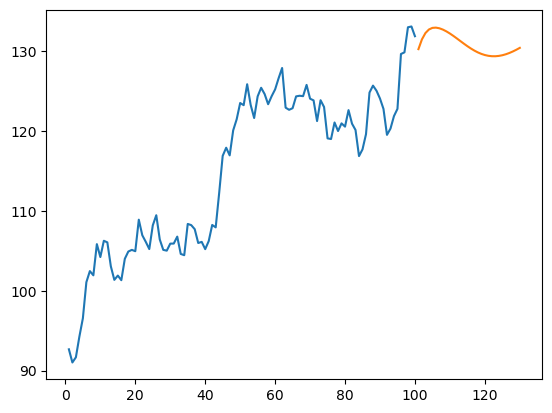

In [70]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.savefig('30daypredict.png')

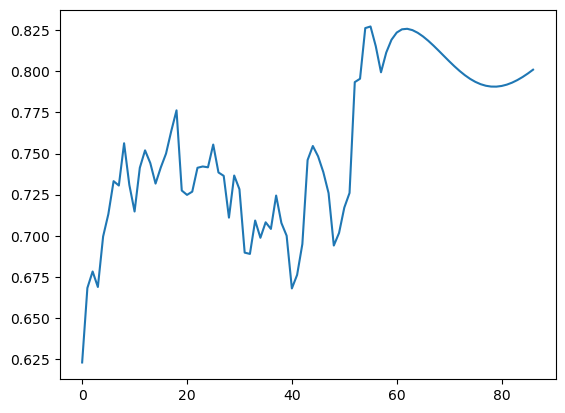

In [71]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])
plt.show()

In [72]:
df3=scaler.inverse_transform(df3).tolist()

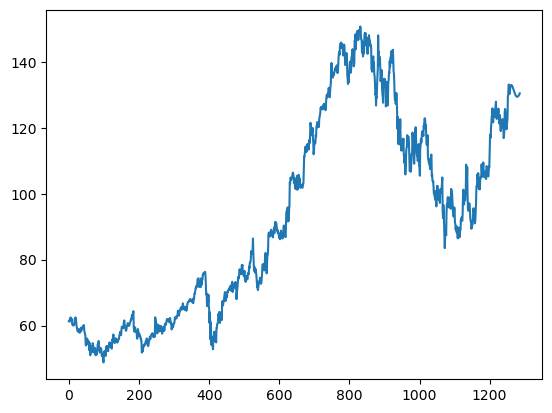

In [73]:
plt.plot(df3)
plt.show()